In [1]:
import re
import requests
import lxml.html
import numpy as np
import pandas as pd
import math
from bs4 import BeautifulSoup
from os import path
import pandas
try:
    import urllib
except ImportError:
    from urlparse import urlparse

r = requests.get('https://en.wikipedia.org/wiki/Academy_Award_for_Best_Picture') #URL Request

root = BeautifulSoup(r.content) 
bp = []
for j in range(2,7):
    table = root.findAll("table")[j].prettify()
    df = pd.read_html(table)[0] 
    winner = False
    i = 0
    year = ""
    for index, row in df.iterrows():   
        if winner:
            bp.append([row['Film']])
            winner = False
        if year != row["Year"] :
            winner = True
            year = df["Year"][index]
            
table = root.findAll("table")[7].prettify()
df = pd.read_html(table)[0] 
winner = False
i = 0
year = ""
for index, row in df.iterrows():   
    if winner:
        bp.append([row['Films']])
        winner = False
    if year != row["Year"] :
        winner = True
        year = df["Year"][index]
for j in range(8,12):
    table = root.findAll("table")[j].prettify()
    df = pd.read_html(table)[0] 
    winner = False
    i = 0
    year = ""
    for index, row in df.iterrows():   
        if winner:
            bp.append([row['Film']])
            winner = False
        if year != row["Year"] :
            winner = True
            year = df["Year"][index]
years = []
for i in range(1928,2019):
    years.append(i)
bestPictures = pd.DataFrame(bp,columns = ["Best Picture"], index = years)
bestPictures = bestPictures.reindex(index=bestPictures.index[::-1])


In [2]:
df = pd.read_html(table)[0] #Read table with pandas

producersGuild = [2,2,1,1,2,2,2,2,2,2,2,2,1,1,1,2,2,1,2,2,1,2,2,0,2,2,1,2,2,2]
for i in range(61):
    producersGuild.append(None)
bestPictures["Producers Guild"] = producersGuild


In [3]:
r = requests.get('https://en.wikipedia.org/wiki/New_York_Film_Critics_Circle') #URL Request

root = BeautifulSoup(r.content) 
table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
df = df.drop(columns = ["Ceremony  [5]","Date"]) 
df = df.drop([84])
years = []
for i in range(1935,2019):
    years.append(i)
df.index = years
df = df.reindex(index=df.index[::-1])
won = df.loc[:,"Best Film Winner" ] 
won2 = bestPictures.loc[2018:1935,"Best Picture" ]
Won = (won2 == won)
Won = Won.replace(True, 2)
bestPictures["New York Film Critics Circle"] = Won


In [4]:
r = requests.get('https://en.wikipedia.org/wiki/Washington_D.C._Area_Film_Critics_Association_Award_for_Best_Film') #URL Request

root = BeautifulSoup(r.content) 
bp = []

table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
table = root.findAll("table")[2].prettify()
df2 = pd.read_html(table)[0] 
df = df.append(df2)
df = df.drop(columns = ["Director"])
df = df.set_index('Year')
df = df.reindex(index=df.index[::-1])
df = df.drop([2019])
won = df.loc[:,"Film" ] 
won2 = bestPictures.loc[2018:2002,"Best Picture" ]
Won = (won2 == won)
Won = Won.replace(True, 2)
bestPictures["Washington D.C. Area Film Critics Association"] = Won
s = "Washington D.C. Area Film Critics Association"
bestPictures.loc[2018,s] = 1
bestPictures.loc[2016,s] = 1
bestPictures.loc[2014,s] = 1
bestPictures.loc[2012,s] = 1
bestPictures.loc[2009,s] = 1
bestPictures.loc[2005,s] = 1



In [5]:
AFI = [1.5,1.5,1.5,1.5,1.5,1.5,1.5,0,0,1.5,0,1.5,0,1.5,1.5,1.5,1.5,1.5,1.5]
for i in range(72):
    AFI.append(None)
bestPictures["AFI Top 10"] = AFI
bestPictures.loc[2011,"AFI Top 10"] = 1.5
bestPictures.loc[2010,"AFI Top 10"] = 1.5


In [6]:
phoenix = [2,2,1,2,2,2,2,2,2,0,2,2,0,0,0,2,1,1,0]
for i in range(72):
    phoenix.append(None)
bestPictures["Phoenix Film Critics Society"] = phoenix


In [7]:
r = requests.get("https://en.wikipedia.org/wiki/Golden_Globe_Award_for_Best_Motion_Picture_%E2%80%93_Drama") #URL Request

root = BeautifulSoup(r.content) 
table = root.findAll("table")[3].prettify()
df = pd.read_html(table)[0] 
df = df.append(df2)
for j in range(4,9):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
currYear = 1949
winners = []
nominees = []
for index, row in df.iterrows():   
    if row["Year"] != currYear:
        currYear = row["Year"]
        winners.append(row["Film"])
    else:
        nominees.append(row["Film"])
w = pd.DataFrame(winners,columns = ["Golden Globe - Drama Winners"])
w = w.drop([69,0,1,2,10,11,12,13,14,15,16,17,18,19])
w = w.reindex(index=w.index[::-1])
n = pd.DataFrame(nominees,columns = ["Golden Globe - Drama Nominees"])
n["Golden Globe - Drama Nominees"] = n["Golden Globe - Drama Nominees"].str.replace(r'[^\w\s]+', '')
n["Golden Globe - Drama Nominees"] = n["Golden Globe - Drama Nominees"].str.replace(r'[ \t]+$', '')
w["Golden Globe - Drama Winners"] = w["Golden Globe - Drama Winners"].str.replace(r'[^\w\s]+', '')
w["Golden Globe - Drama Winners"] = w["Golden Globe - Drama Winners"].str.replace(r'[ \t]+$', '')
years = []
for i in range(2018,1962,-1):
    years.append(i)
w.index = years
won = w.loc[:,"Golden Globe - Drama Winners" ] 
won2 = bestPictures.loc[2018:1963,"Best Picture" ]
Won = (won2 == won)
Won = Won.replace(True, 2)
bestPictures["Golden Globes"] = Won
for index, row in bestPictures.iterrows(): 
    if row["Best Picture"] in list(n["Golden Globe - Drama Nominees"]):
        bestPictures.loc[index,"Golden Globes"] = 1



/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [8]:
r = requests.get("https://en.wikipedia.org/wiki/Golden_Globe_Award_for_Best_Motion_Picture_%E2%80%93_Musical_or_Comedy") #URL Request

root = BeautifulSoup(r.content) 
table = root.findAll("table")[3].prettify()
df = pd.read_html(table)[0] 
df = df.append(df2)
for j in range(4,9):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
currYear = 1949
winners = []
nominees = []
for index, row in df.iterrows():   
    if row["Year"] != currYear:
        currYear = row["Year"]
        winners.append(row["Film"])
    else:
        nominees.append(row["Film"])
w = pd.DataFrame(winners,columns = ["Golden Globe - Comedy Winners"])
w = w.drop([66,7,8,9,10,11,12,13,14,15,16])
w = w.reindex(index=w.index[::-1])
n = pd.DataFrame(nominees,columns = ["Golden Globe - Comedy Nominees"])
n["Golden Globe - Comedy Nominees"] = n["Golden Globe - Comedy Nominees"].str.replace(r'[^\w\s]+', '')
n["Golden Globe - Comedy Nominees"] = n["Golden Globe - Comedy Nominees"].str.replace(r'[ \t]+$', '')
w["Golden Globe - Comedy Winners"] = w["Golden Globe - Comedy Winners"].str.replace(r'[^\w\s]+', '')
w["Golden Globe - Comedy Winners"] = w["Golden Globe - Comedy Winners"].str.replace(r'[ \t]+$', '')
years = []
for i in range(2018,1962,-1):
    years.append(i)
w.index = years
won = w.loc[:,"Golden Globe - Comedy Winners" ] 
won2 = bestPictures.loc[2018:1963,"Best Picture" ]
Won = (won2 == won)
Won = Won.replace(True, 2)
for index, row in bestPictures.iterrows(): 
    if index > 1962:
        bestPictures.loc[index,"Golden Globes"] = max(row["Golden Globes"],Won[index])       
    if row["Best Picture"] in list(n["Golden Globe - Comedy Nominees"]):
        bestPictures.loc[index,"Golden Globes"] = 1
bestPictures.loc[2014,"Golden Globes"] = 1


In [9]:
nc = [0,1,1,2,1,2,0]
for i in range(84):
    nc.append(None)
bestPictures["North Carolina Film Critics Association"] = nc


In [10]:
r = requests.get("https://en.wikipedia.org/wiki/Boston_Society_of_Film_Critics_Award_for_Best_Film") #URL Request

root = BeautifulSoup(r.content) 
table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
for j in range(2,5):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
for index, row in bestPictures.iterrows(): 
    if index > 1979:
        bestPictures.loc[index,"Boston Society of Film Critics"] = 0
    if row["Best Picture"] in list(df["Winner"]):
        bestPictures.loc[index,"Boston Society of Film Critics"] = 2


In [11]:
r = requests.get("https://en.wikipedia.org/wiki/National_Board_of_Review_Award_for_Best_Film") #URL Request

root = BeautifulSoup(r.content) 
table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
for j in range(2,11):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
df["Winner"] = df["Winner"].str.replace(r'[^\w\s]+', '')
df["Winner"] = df["Winner"].str.replace(r'[ \t]+$', '')

for index, row in bestPictures.iterrows(): 
    if index > 1931:
        if index == 1939 or index == 1932 or index == 1936 or index == 1938 or index == 1949 or index == 1952 or index == 1967 or index == 1974 or index == 1978 or index == 1984 or index == 1986 or index == 1988 or index == 2001 or index == 2003 or index == 2017:
            bestPictures.loc[index,"National Board of Review Award"] = 0
        else:
            bestPictures.loc[index,"National Board of Review Award"] = 1
    if row["Best Picture"] in list(df["Winner"]):
        bestPictures.loc[index,"National Board of Review Award"] = 2


In [12]:
lv = [1,1,1,2,2,2,1,2,1,2,0,2,2,1,1,2,0,0,0,2,0,2]
for i in range(69):
    lv.append(None)
bestPictures["Las Vegas Film Critics Association"] = lv


In [13]:
r = requests.get("https://en.wikipedia.org/wiki/Online_Film_Critics_Society_Award_for_Best_Picture") #URL Request

root = BeautifulSoup(r.content) 
table = root.findAll("table")[2].prettify()
df = pd.read_html(table)[0] 
for j in range(3,5):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)

currYear = 1949
winners = []
nominees = []
for index, row in df.iterrows():   
    if row["Year"] != currYear:
        currYear = row["Year"]
        winners.append(row["Winner and nominees"])
    else:
        nominees.append(row["Winner and nominees"])
w = pd.DataFrame(winners,columns = ["Online Film Critics Society Award"])
w = w.reindex(index=w.index[::-1])
n = pd.DataFrame(nominees,columns = ["Online Film Critics Society Award"])
years = []
for i in range(2017,1996,-1):
    years.append(i)
w.index = years
won = w.loc[:,"Online Film Critics Society Award" ] 
won2 = bestPictures.loc[2017:1997,"Best Picture" ]
Won = (won2 == won)
Won = Won.replace(True, 2)
for index, row in bestPictures.iterrows(): 
    if index > 1996 and index < 2018:
        bestPictures.loc[index,"Online Film Critics Society Award"] = Won[index]    
    if row["Best Picture"] in list(n["Online Film Critics Society Award"]):
        bestPictures.loc[index,"Online Film Critics Society Award"] = 1
bestPictures.loc[2018,"Online Film Critics Society Award"] = 0


In [14]:
cc = [1,2,1,2,1,2,2,2,1,2,2,2,2,1,1,2,2,2,2,2,1,1,1]
for i in range(68):
    cc.append(None)
bestPictures["Critic's Choice"] = cc


In [15]:
r = requests.get("https://en.wikipedia.org/wiki/National_Society_of_Film_Critics_Award_for_Best_Film") #URL Request

root = BeautifulSoup(r.content) 
table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
for j in range(2,7):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)

for index, row in bestPictures.iterrows(): 
    if index > 1965 and row["Best Picture"] in list(df["Winner"]):
        bestPictures.loc[index,"National Society of Film Critics"] = 2
    elif index == 2014 or index == 2013 or index == 2007 or index == 1987 or index == 1986 or index == 1979 or index == 1978 or index == 1972:
        bestPictures.loc[index,"National Society of Film Critics"] = 1
    elif index > 1965:
        bestPictures.loc[index,"National Society of Film Critics"] = 0


In [16]:
r = requests.get("https://en.wikipedia.org/wiki/Screen_Actors_Guild_Award_for_Outstanding_Performance_by_a_Cast_in_a_Motion_Picture")
root = BeautifulSoup(r.content) 
table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
for j in range(2,5):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
df.index = np.arange(0, len(df))
win = ""
winners = []
nominees = []
currYear = 1949
for index, row in df.iterrows():   
    if row["Year"] != currYear:
        currYear = row["Year"]
        winners.append(row["Film"])
    else:
        nominees.append(row["Film"])
w = pd.DataFrame(winners,columns = ["SAG"])
n = pd.DataFrame(nominees,columns = ["SAG"])
n["SAG"] = n["SAG"].str.replace(r'[^\w\s]+', '')
n["SAG"] = n["SAG"].str.replace(r'[ \t]+$', '')
w["SAG"] = w["SAG"].str.replace(r'[^\w\s]+', '')
w["SAG"] = w["SAG"].str.replace(r'[ \t]+$', '')
for index, row in bestPictures.iterrows(): 
    if index >= 1995 and row["Best Picture"] in list(w["SAG"]):
        bestPictures.loc[index,"SAG"] = 2
    elif index >= 1995 and row["Best Picture"] in list(n["SAG"]):
        bestPictures.loc[index,"SAG"] = 1
    elif index >= 1995:
        bestPictures.loc[index,"SAG"] = 0
bestPictures.loc[2014,"SAG"] = 2



In [17]:
r = requests.get("https://en.wikipedia.org/wiki/BAFTA_Award_for_Best_Film")
root = BeautifulSoup(r.content) 
table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
for j in range(2,9):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
df.index = np.arange(0, len(df))
win = ""
winners = []
nominees = []
for index, row in df.iterrows():
    if row["Category"] != win:
        win = row["Category"]
        winners.append(row["Film"])
    else:
        nominees.append(row["Film"])
    
for index, row in bestPictures.iterrows(): 
    if index >= 1947 and row["Best Picture"] in winners:
        bestPictures.loc[index,"BAFTA"] = 2
    elif index >= 1947 and row["Best Picture"] in nominees:
        bestPictures.loc[index,"BAFTA"] = 1
    elif index >= 1947:
        bestPictures.loc[index,"BAFTA"] = 0


In [18]:
r = requests.get("https://en.wikipedia.org/wiki/Toronto_Film_Critics_Association_Award_for_Best_Film")
root = BeautifulSoup(r.content) 
table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
for j in range(2,5):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
df.index = np.arange(0, len(df))
win = ""
winners = []
nominees = []
currYear = 1949
for index, row in df.iterrows():   
    if row["Year"] != currYear:
        currYear = row["Year"]
        winners.append(row["Winner"])
    else:
        nominees.append(row["Winner"])
w = pd.DataFrame(winners,columns = ["Toronto Film Critics Association"])
n = pd.DataFrame(nominees,columns = ["Toronto Film Critics Association"])
n["Toronto Film Critics Association"] = n["Toronto Film Critics Association"].str.replace(r'[^\w\s]+', '')
n["Toronto Film Critics Association"] = n["Toronto Film Critics Association"].str.replace(r'[ \t]+$', '')
w["Toronto Film Critics Association"] = w["Toronto Film Critics Association"].str.replace(r'[^\w\s]+', '')
w["Toronto Film Critics Association"] = w["Toronto Film Critics Association"].str.replace(r'[ \t]+$', '')
for index, row in bestPictures.iterrows(): 
    if index >= 1995 and row["Best Picture"] in list(w["Toronto Film Critics Association"]):
        bestPictures.loc[index,"Toronto Film Critics Association"] = 2
    elif index >= 1995 and row["Best Picture"] in list(n["Toronto Film Critics Association"]):
        bestPictures.loc[index,"Toronto Film Critics Association"] = 1
    elif index >= 1995:
        bestPictures.loc[index,"Toronto Film Critics Association"] = 0


In [19]:
r = requests.get("https://en.wikipedia.org/wiki/Los_Angeles_Film_Critics_Association_Award_for_Best_Film")
root = BeautifulSoup(r.content) 
table = root.findAll("table")[1].prettify()
df = pd.read_html(table)[0] 
for j in range(2,7):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
df.index = np.arange(0, len(df))

winners = []
for index, row in df.iterrows():   
    winners.append(row["Film"])

w = pd.DataFrame(winners,columns = ["Los Angeles Film Critics Association"])
for index, row in bestPictures.iterrows(): 
    if index >= 1975 and row["Best Picture"] in list(w["Los Angeles Film Critics Association"]):
        bestPictures.loc[index,"Los Angeles Film Critics Association"] = 2
    elif index >= 1975:
        bestPictures.loc[index,"Los Angeles Film Critics Association"] = 0


In [20]:
stl = [0,2,0,2,0,2,2,2,0,0,0,2,2,0,0]
for i in range(91-15):
    stl.append(None)
bestPictures["St. Louis Gateway Film Critics Association"] = stl

In [21]:
ind = [0,1,2,2,0,2,0,2,0,1]
for i in range(91-10):
    ind.append(None)
bestPictures["Indiana Film Journalists Association"] = ind

In [22]:
hou = [1,1,1,2,1,2,2,1,1,2,1,2]
for i in range(91-12):
    hou.append(None)
bestPictures["Houston Film Critics Society"] = hou

In [23]:
fla = [0,0,0,0,2,2,2,0,0,0,2,2,2,0,0,2,0,0,0,0,2,2,0]
for i in range(91-23):
    fla.append(None)
bestPictures["Florida Film Critics Circle"] = fla

In [24]:
det = [1,1,1,2,1,1,1,2,1,1,2,2]
for i in range(91-len(det)):
    det.append(None)
bestPictures["Detroit Film Critics Society"] = det

In [25]:
dfw = [0,2,2,2,2,2,0,0,0,0,2,2,0,0,2,2,2,2,0,2,0,0,0,0,0,2,2,0,2]
for i in range(91-len(dfw)):
    dfw.append(None)
bestPictures["Dallas–Fort Worth Film Critics Association"] = dfw

In [26]:
r = requests.get("https://en.wikipedia.org/wiki/Chicago_Film_Critics_Association_Award_for_Best_Film")
root = BeautifulSoup(r.content) 
table = root.findAll("table")[0].prettify()
df = pd.read_html(table)[0] 
for j in range(1,5):
    table = root.findAll("table")[j].prettify()
    df2 = pd.read_html(table)[0] 
    df = df.append(df2)
df.index = np.arange(0, len(df))
win = ""
winners = []
nominees = []
currYear = 1949
for index, row in df.iterrows():   
    if row["Year"] != currYear:
        currYear = row["Year"]
        winners.append(row["Winner"])
        winners.append(row["Winner and nominees"])
    else:
        nominees.append(row["Winner"])
        nominees.append(row["Winner and nominees"])
for index, row in bestPictures.iterrows(): 
    if index >= 1988 and row["Best Picture"] in winners:
        bestPictures.loc[index,"Chicago Film Critics Association"] = 2
    elif index >= 1988 and row["Best Picture"] in nominees:
        bestPictures.loc[index,"Chicago Film Critics Association"] = 1
    elif index >= 1988:
        bestPictures.loc[index,"Chicago Film Critics Association"] = 0


In [27]:
bestPictures.columns[1:]

Index(['Producers Guild', 'New York Film Critics Circle',
       'Washington D.C. Area Film Critics Association', 'AFI Top 10',
       'Phoenix Film Critics Society', 'Golden Globes',
       'North Carolina Film Critics Association',
       'Boston Society of Film Critics', 'National Board of Review Award',
       'Las Vegas Film Critics Association',
       'Online Film Critics Society Award', 'Critic's Choice',
       'National Society of Film Critics', 'SAG', 'BAFTA',
       'Toronto Film Critics Association',
       'Los Angeles Film Critics Association',
       'St. Louis Gateway Film Critics Association',
       'Indiana Film Journalists Association', 'Houston Film Critics Society',
       'Florida Film Critics Circle', 'Detroit Film Critics Society',
       'Dallas–Fort Worth Film Critics Association',
       'Chicago Film Critics Association'],
      dtype='object')

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

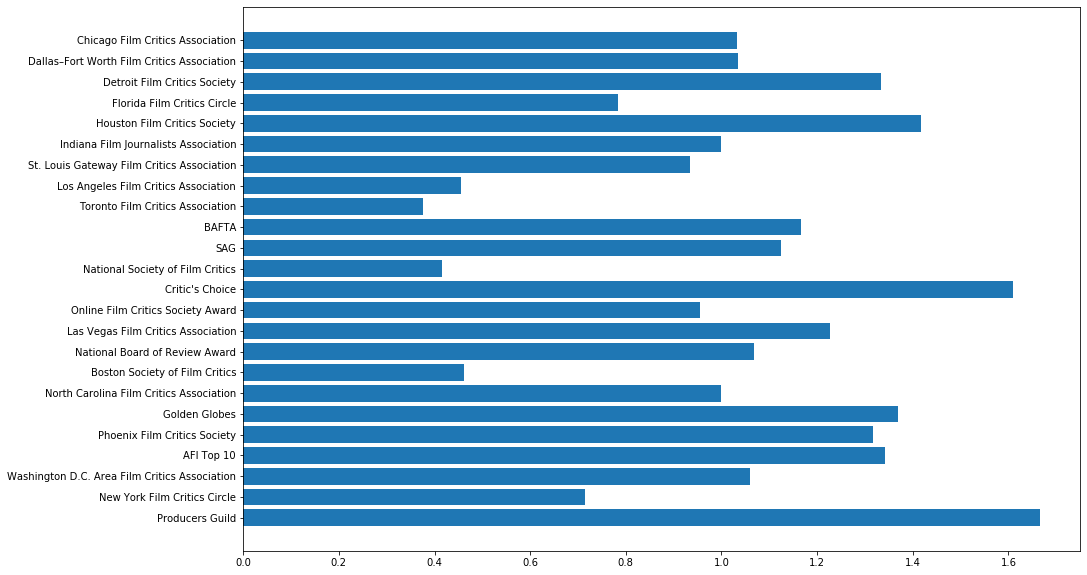

In [28]:
PG = bestPictures["Producers Guild"].sum()/bestPictures["Producers Guild"].count()
NY = bestPictures["New York Film Critics Circle"].sum()/bestPictures["New York Film Critics Circle"].count()
DC = bestPictures["Washington D.C. Area Film Critics Association"].sum()/bestPictures["Washington D.C. Area Film Critics Association"].count()
AFI = bestPictures["AFI Top 10"].sum()/bestPictures["AFI Top 10"].count()
PHX = bestPictures["Phoenix Film Critics Society"].sum()/bestPictures["Phoenix Film Critics Society"].count()
GG = bestPictures["Golden Globes"].sum()/bestPictures["Golden Globes"].count()
NC = bestPictures["North Carolina Film Critics Association"].sum()/bestPictures["North Carolina Film Critics Association"].count()
BOS = bestPictures["Boston Society of Film Critics"].sum()/bestPictures["Boston Society of Film Critics"].count()
NB = bestPictures["National Board of Review Award"].sum()/bestPictures["National Board of Review Award"].count()
LV = bestPictures["Las Vegas Film Critics Association"].sum()/bestPictures["Las Vegas Film Critics Association"].count()
OFC = bestPictures["Online Film Critics Society Award"].sum()/bestPictures["Online Film Critics Society Award"].count()
CC = bestPictures["Critic's Choice"].sum()/bestPictures["Critic's Choice"].count()
NS = bestPictures["National Society of Film Critics"].sum()/bestPictures["National Society of Film Critics"].count()
BAFTA = bestPictures["BAFTA"].sum()/bestPictures["BAFTA"].count()
SAG = bestPictures["SAG"].sum()/bestPictures["SAG"].count()

TF = bestPictures["Toronto Film Critics Association"].sum()/bestPictures["Toronto Film Critics Association"].count()
LA = bestPictures["Los Angeles Film Critics Association"].sum()/bestPictures["Los Angeles Film Critics Association"].count()
STL = bestPictures["St. Louis Gateway Film Critics Association"].sum()/bestPictures["St. Louis Gateway Film Critics Association"].count()
IND = bestPictures["Indiana Film Journalists Association"].sum()/bestPictures["Indiana Film Journalists Association"].count()
HOU = bestPictures["Houston Film Critics Society"].sum()/bestPictures["Houston Film Critics Society"].count()
FLA = bestPictures["Florida Film Critics Circle"].sum()/bestPictures["Florida Film Critics Circle"].count()
DET = bestPictures["Detroit Film Critics Society"].sum()/bestPictures["Detroit Film Critics Society"].count()
DFW = bestPictures["Dallas–Fort Worth Film Critics Association"].sum()/bestPictures["Dallas–Fort Worth Film Critics Association"].count()
CHI = bestPictures["Chicago Film Critics Association"].sum()/bestPictures["Chicago Film Critics Association"].count()


df = pd.DataFrame({'lab':bestPictures.columns[1:],
                   'val':[PG,NY,DC,AFI,PHX,GG,NC,BOS,NB,LV,OFC,CC,NS,BAFTA,SAG,TF,LA,STL,IND,HOU,FLA,DET,DFW,CHI]})
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(15,10))
plt.barh(df['lab'], df['val'])
plt



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

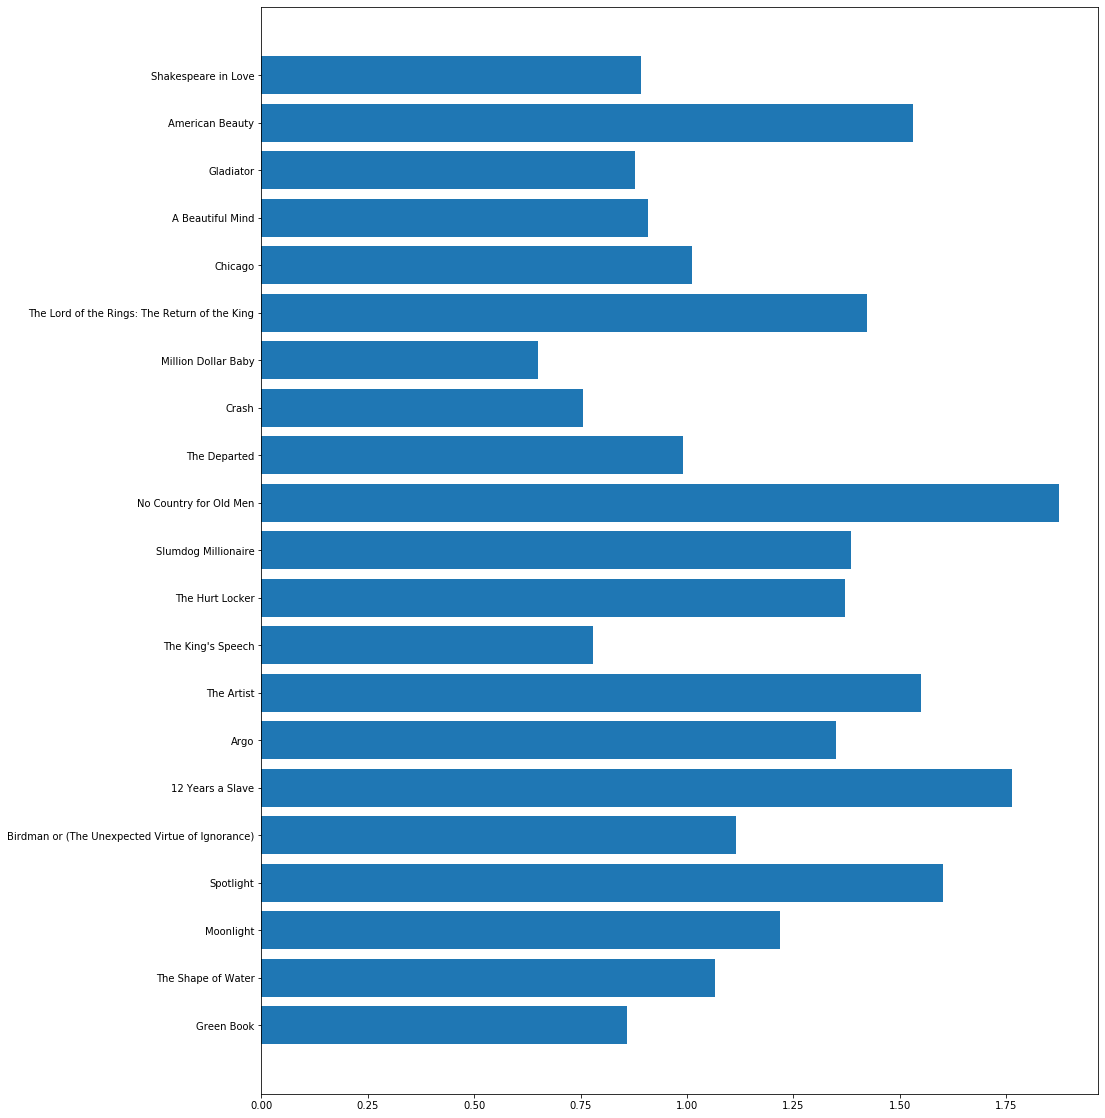

In [34]:
bp = bestPictures.fillna(-1)
for index, row in bestPictures.iterrows(): 
    total = 0
    i = 0
    nan = 0
    if index >= 1998: 
        for col in bestPictures:
            if i == 1:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(PG*bp.loc[index,col])
            if i == 2:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NY*bp.loc[index,col])
            if i == 3:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DC*bp.loc[index,col])
            if i == 4:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(AFI*bp.loc[index,col])
            if i == 5:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(PHX*bp.loc[index,col])
            if i == 6:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(GG*bp.loc[index,col])
            if i == 7:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NC*bp.loc[index,col])
            if i == 8:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(BOS*bp.loc[index,col])
            if i == 9:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NB*bp.loc[index,col])
            if i == 10:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(LV*bp.loc[index,col])
            if i == 11:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(OFC*bp.loc[index,col])
            if i == 12:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(CC*bp.loc[index,col])
            if i == 13:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NS*bp.loc[index,col])
            if i == 14:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(SAG*bp.loc[index,col])
            if i == 15:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(BAFTA*bp.loc[index,col])
            if i == 16:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(TF*bp.loc[index,col])
            if i == 17:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(LA*bp.loc[index,col])
            if i == 18:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(STL*bp.loc[index,col])
            if i == 19:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(IND*bp.loc[index,col])
            if i == 20:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(HOU*bp.loc[index,col])
            if i == 21:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(FLA*bp.loc[index,col])
            if i == 22:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DET*bp.loc[index,col])
            if i == 23:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DFW*bp.loc[index,col])
            if i == 24:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(CHI*bp.loc[index,col])
            i+=1
        bestPictures.loc[index,"Weighted Total"] = total/(24-nan)
plt.figure(figsize=(15,20))
plt.barh(bestPictures.loc[2018:1998,"Best Picture"], bestPictures.loc[2018:1998,"Weighted Total"])
plt

In [30]:
imdb = [8.2,7.3,7.4,8.1,7.7,8.1,7.7,7.9,8.0,7.6,8.0,8.1,8.5,7.8,8.1,8.9,7.1,8.2,8.5,8.3,7.1,7.8,7.4,8.3,8.8,8.9,8.2\
        ,8.6,8.0,7.4,8.0,7.7,8.1,7.2,8.3,7.4,8.0,7.2,7.7,7.8,8.1,8.0,8.1,8.7,9.0,8.3,9.2,7.7,7.9,7.8,7.4,8.0,7.7\
        ,8.0,7.8,6.5,8.3,7.5,8.3,8.1,6.7,8.1,6.8,7.7,8.1,7.6,6.6,7.2,8.2,7.5,7.6,7.2,8.0,7.9,7.1,8.5,7.6,7.7,8.1\
        ,8.1,7.9,7.2,6.7,7.7,8.1,5.9,7.4,5.9,8.0,5.7,7.5]
bestPictures["IMDb Scores"] = imdb
bestPictures

,Best Picture,Producers Guild,New York Film Critics Circle,Washington D.C. Area Film Critics Association,AFI Top 10,Phoenix Film Critics Society,Golden Globes,North Carolina Film Critics Association,Boston Society of Film Critics,National Board of Review Award,...,Los Angeles Film Critics Association,St. Louis Gateway Film Critics Association,Indiana Film Journalists Association,Houston Film Critics Society,Florida Film Critics Circle,Detroit Film Critics Society,Dallas–Fort Worth Film Critics Association,Chicago Film Critics Association,Weighted Total,IMDb Scores
2018,Green Book,2.0,0.0,1.0,1.5,2.0,2.0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.194287,8.2
2017,The Shape of Water,2.0,0.0,0.0,1.5,2.0,1.0,1.0,0.0,0.0,...,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1.127491,7.3
2016,Moonlight,1.0,0.0,1.0,1.5,1.0,2.0,1.0,0.0,1.0,...,2.0,0.0,2.0,1.0,0.0,1.0,2.0,2.0,1.248477,7.4
2015,Spotlight,1.0,0.0,2.0,1.5,2.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,0.0,2.0,2.0,1.0,1.715985,8.1
2014,Birdman or (The Unexpected Virtue of Ignorance),2.0,0.0,1.0,1.5,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,1.357952,7.7
2013,12 Years a Slave,2.0,0.0,2.0,1.5,2.0,2.0,2.0,2.0,1.0,...,0.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.957065,8.1
2012,Argo,2.0,0.0,1.0,1.5,2.0,2.0,0.0,0.0,1.0,...,0.0,2.0,0.0,2.0,2.0,1.0,0.0,1.0,1.585319,7.7
2011,The Artist,2.0,2.0,2.0,1.5,2.0,2.0,NaN,2.0,1.0,...,0.0,2.0,2.0,1.0,0.0,2.0,0.0,1.0,1.958208,7.9
2010,The King's Speech,2.0,0.0,0.0,1.5,2.0,0.0,NaN,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.015453,8.0
2009,The Hurt Locker,2.0,2.0,1.0,1.5,0.0,1.0,NaN,2.0,1.0,...,2.0,0.0,1.0,2.0,0.0,1.0,0.0,2.0,1.724344,7.6


In [109]:
rt = [93,35,100,55,86,58,98,94,62,78,92,90,100,91,92,98,80,100,96,78,91,97,100,95,45,92,98,100,71,95,79,86,94,93,98,\
     85,95,84,82,96,82,91,96,98,98,93,97,94,94,97,94,89,89,84,84,84,93,60,88,91,90,81,82,96,96,97,72,77,85,89,92,87,\
     76,74,86,93,91,74,91,93,91,97,95,95,96,95,91,97,98,92,78]
rt = rt[::-1]
bestPictures["Rotten Tomatoes Scores"] = rt


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

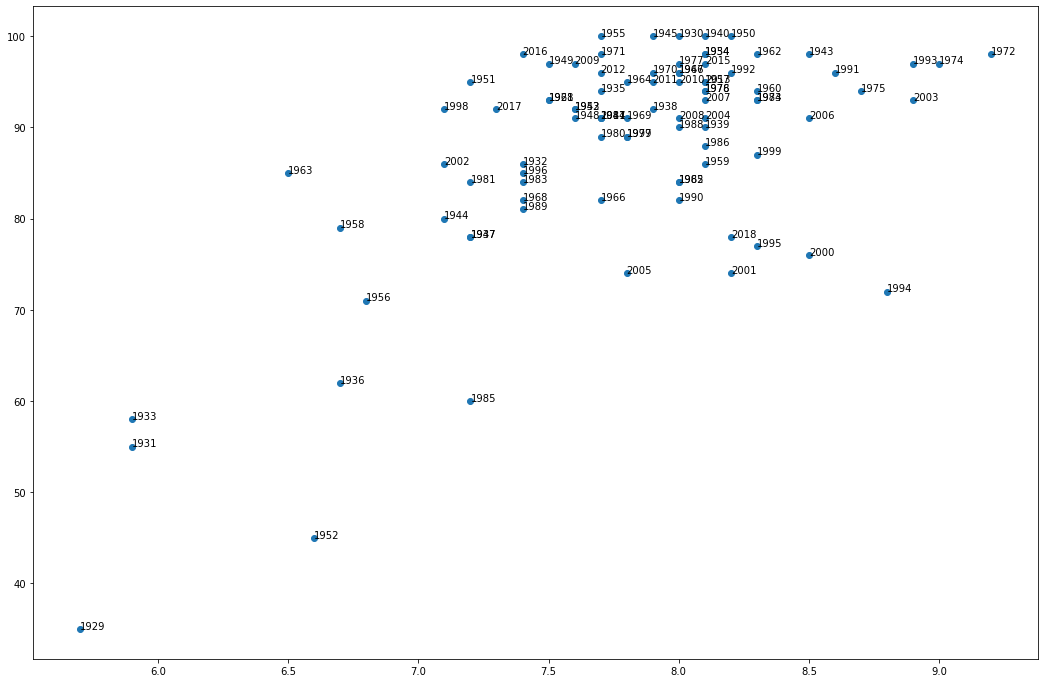

In [116]:
plt.figure(figsize=(18,12))
plt.scatter(bestPictures.loc[:,"IMDb Scores"],bestPictures.loc[:,"Rotten Tomatoes Scores"])
for i, txt in enumerate(bestPictures.index):
    plt.annotate(txt,(bestPictures.loc[txt,"IMDb Scores"],bestPictures.loc[txt,"Rotten Tomatoes Scores"]))
plt


In [91]:
irishman = ["The Irishman",None,2,1,1.5,None,1,None,None,2,None,None,1,None,1,None,1,0,1,None,None,None,1,None,None,None]
ouatih = ["Once Upon a Time in Hollywood",None,0,1,1.5,None,1,None,None,1,None,None,1,None,1,None,0,0,1,None,None,None,1,None,None,None]
parasite = ["Parasite",None,0,2,1.5,None,1,None,None,2,None,None,1,None,1,None,2,2,0,None,None,None,2,None,None,None]
ms = ["Marriage Story",None,0,1,1.5,None,1,None,None,1,None,None,1,None,0,None,1,0,1,None,None,None,1,None,None,None]
a1917 = ["1917",None,0,1,1.5,None,1,None,None,1,None,None,1,None,0,None,0,0,1,None,None,None,0,None,None,None]
jojo = ["Jojo Rabbit",None,0,0,1.5,None,1,None,None,1,None,None,1,None,1,None,0,0,1,None,None,None,1,None,None,None]
joker = ["Joker",None,0,0,1.5,None,1,None,None,0,None,None,1,None,0,None,0,0,0,None,None,None,0,None,None,None]
fvf = ["Ford v Ferrari",None,0,0,0,None,0,None,None,1,None,None,1,None,0,None,0,0,0,None,None,None,0,None,None,None]
lw = ["Little Women",None,0,0,1.5,None,0,None,None,0,None,None,1,None,0,None,0,0,1,None,None,None,0,None,None,None]
ko = ["Knives Out",None,0,0,1.5,None,1,None,None,1,None,None,0,None,0,None,0,0,0,None,None,None,0,None,None,None]
contenders = pd.DataFrame([irishman,ouatih,parasite,ms,a1917,jojo,joker,fvf,lw,ko],columns = bestPictures.columns[:-1])
contenders = contenders.rename({'Best Picture': "Film"}, axis=1)
contenders


,Film,Producers Guild,New York Film Critics Circle,Washington D.C. Area Film Critics Association,AFI Top 10,Phoenix Film Critics Society,Golden Globes,North Carolina Film Critics Association,Boston Society of Film Critics,National Board of Review Award,...,Toronto Film Critics Association,Los Angeles Film Critics Association,St. Louis Gateway Film Critics Association,Indiana Film Journalists Association,Houston Film Critics Society,Florida Film Critics Circle,Detroit Film Critics Society,Dallas–Fort Worth Film Critics Association,Chicago Film Critics Association,Weighted Total
0,The Irishman,None,2,1,1.5,None,1,None,None,2,...,1,0,1,None,None,None,1,None,None,None
1,Once Upon a Time in Hollywood,None,0,1,1.5,None,1,None,None,1,...,0,0,1,None,None,None,1,None,None,None
2,Parasite,None,0,2,1.5,None,1,None,None,2,...,2,2,0,None,None,None,2,None,None,None
3,Marriage Story,None,0,1,1.5,None,1,None,None,1,...,1,0,1,None,None,None,1,None,None,None
4,1917,None,0,1,1.5,None,1,None,None,1,...,0,0,1,None,None,None,0,None,None,None
5,Jojo Rabbit,None,0,0,1.5,None,1,None,None,1,...,0,0,1,None,None,None,1,None,None,None
6,Joker,None,0,0,1.5,None,1,None,None,0,...,0,0,0,None,None,None,0,None,None,None
7,Ford v Ferrari,None,0,0,0.0,None,0,None,None,1,...,0,0,0,None,None,None,0,None,None,None
8,Little Women,None,0,0,1.5,None,0,None,None,0,...,0,0,1,None,None,None,0,None,None,None
9,Knives Out,None,0,0,1.5,None,1,None,None,1,...,0,0,0,None,None,None,0,None,None,None


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

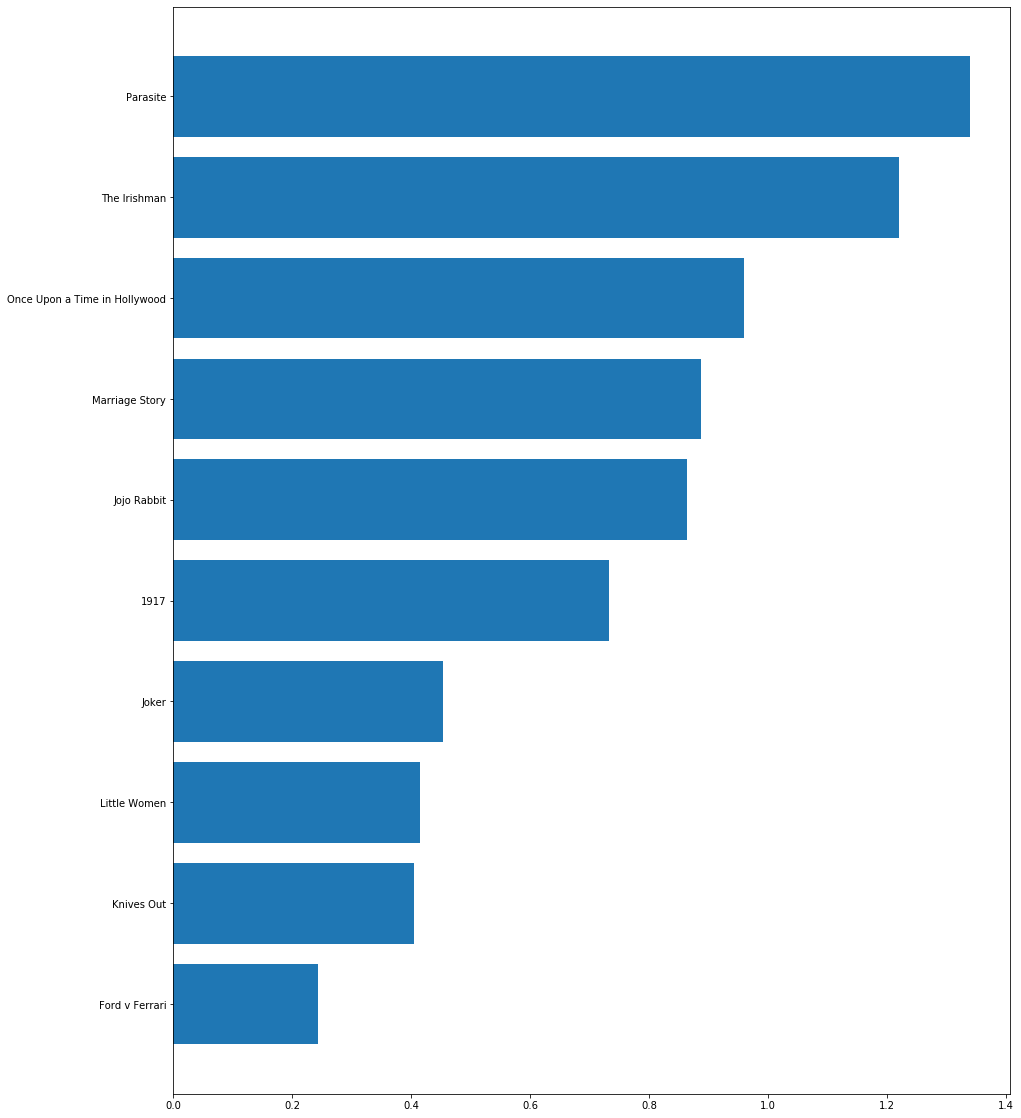

In [92]:
bp = contenders.fillna(-1)
for index, row in contenders.iterrows(): 
    total = 0
    i = 0
    nan = 0
    if index >= 0: 
        for col in contenders:
            if i == 1:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(PG*bp.loc[index,col])
            if i == 2:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NY*bp.loc[index,col])
            if i == 3:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DC*bp.loc[index,col])
            if i == 4:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(AFI*bp.loc[index,col])
            if i == 5:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(PHX*bp.loc[index,col])
            if i == 6:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(GG*bp.loc[index,col])
            if i == 7:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NC*bp.loc[index,col])
            if i == 8:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(BOS*bp.loc[index,col])
            if i == 9:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NB*bp.loc[index,col])
            if i == 10:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(LV*bp.loc[index,col])
            if i == 11:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(OFC*bp.loc[index,col])
            if i == 12:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(CC*bp.loc[index,col])
            if i == 13:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(NS*bp.loc[index,col])
            if i == 14:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(SAG*bp.loc[index,col])
            if i == 15:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(BAFTA*bp.loc[index,col])
            if i == 16:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(TF*bp.loc[index,col])
            if i == 17:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(LA*bp.loc[index,col])
            if i == 18:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(STL*bp.loc[index,col])
            if i == 19:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(IND*bp.loc[index,col])
            if i == 20:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(HOU*bp.loc[index,col])
            if i == 21:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(FLA*bp.loc[index,col])
            if i == 22:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DET*bp.loc[index,col])
            if i == 23:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(DFW*bp.loc[index,col])
            if i == 24:
                if bp.loc[index,col] == -1:
                    nan+=1    
                else:
                    total+=(CHI*bp.loc[index,col])
            i+=1
        contenders.loc[index,"Weighted Total"] = total/(24-nan)
plt.figure(figsize=(15,20))
plt.barh(contenders.sort_values(by=['Weighted Total']).loc[:,"Film"], contenders.sort_values(by=['Weighted Total']).loc[:,"Weighted Total"])
plt

7.7813186813186865


88.934

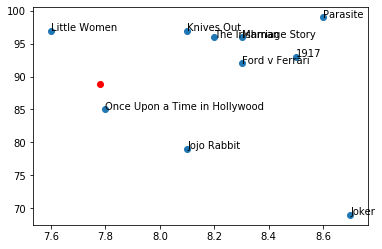

In [94]:
Cimdb = [8.2,7.8,8.6,8.3,8.5,8.1,8.7,8.3,7.6,8.1]
Crotten = [96,85,99,96,93,79,69,92,97,97]
contenders["IMDb Scores"] = Cimdb
contenders["Rotten Tomato Scores"] = Crotten
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Cimdb,Crotten)
for i, txt in enumerate(contenders['Film']):
    ax.annotate(txt,(Cimdb[i],Crotten[i]))
ax.scatter(7.78,88.94,color = "r")